<a href="https://colab.research.google.com/github/sujitojha1/ERA1/blob/main/Session10/ERA1_S10_CIFAR10_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Module and Models

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/sujitojha1/ERA1 -q --quiet
!mv ERA1/Session10/*.py .
!rm -rf ERA1
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models
  Preparing metadata (setup.py) ... done


## Loading train and test data with transforms and loader functions



In [105]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=512)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified


## Exploratory Data Analysis


### Summary Statistics

In [106]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### Plotting sample images

Files already downloaded and verified


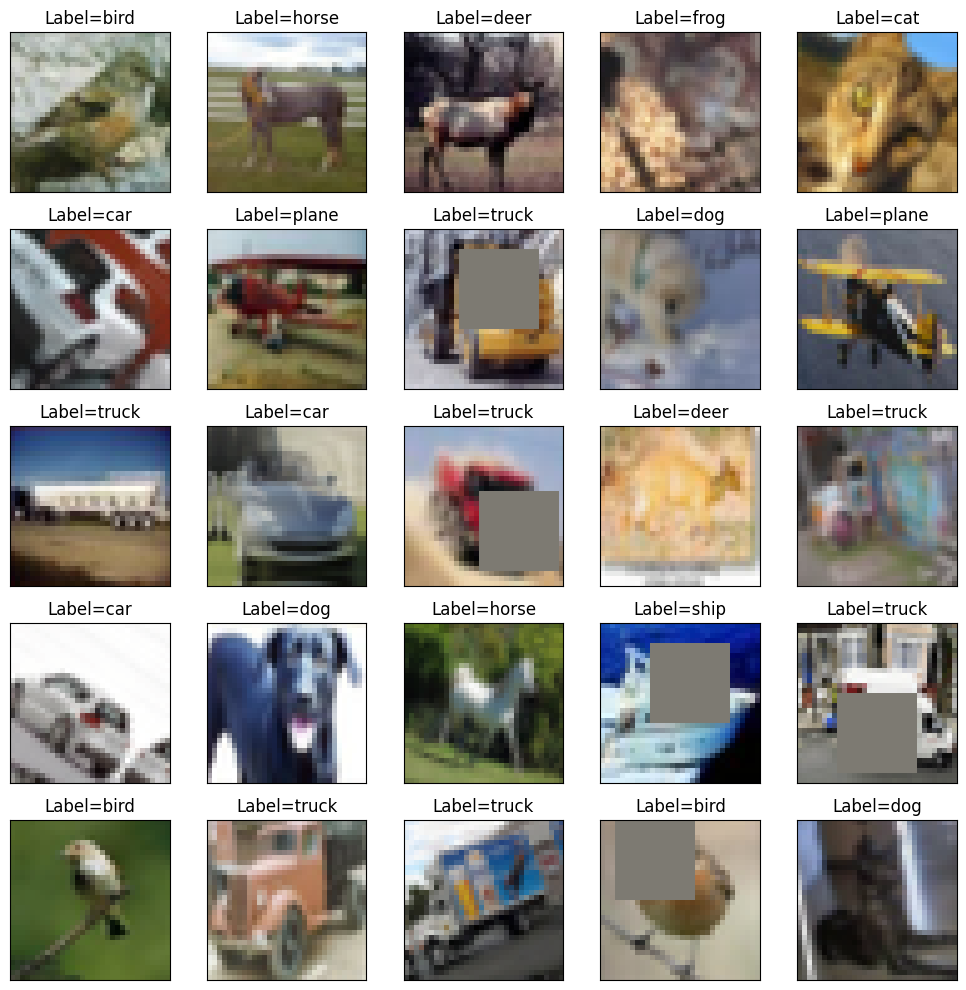

In [107]:
cifar10.sample_pictures(train_flag=True)

## The Model

In [108]:
from model import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary



In [109]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
                 X-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

## Define a Loss function and optimizer

In [110]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.85)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

## Training and Testing

In [ ]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 30

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test.execute(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=2.03 Batch_id=97 Accuracy=35.78: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]


Test set: Average loss: 0.0039, Accuracy: 4943/10000 (49.43%)



Epoch: 1,Loss=1.98 Batch_id=97 Accuracy=49.46: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0039, Accuracy: 5319/10000 (53.19%)



Epoch: 2,Loss=1.93 Batch_id=97 Accuracy=54.38: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


Test set: Average loss: 0.0037, Accuracy: 6123/10000 (61.23%)



Epoch: 3,Loss=1.90 Batch_id=97 Accuracy=58.33: 100%|██████████| 98/98 [00:20<00:00,  4.68it/s]


Test set: Average loss: 0.0036, Accuracy: 6455/10000 (64.55%)



Epoch: 4,Loss=1.83 Batch_id=97 Accuracy=61.26: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0037, Accuracy: 6410/10000 (64.10%)



Epoch: 5,Loss=1.80 Batch_id=97 Accuracy=63.10: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0036, Accuracy: 6707/10000 (67.07%)



Epoch: 6,Loss=1.79 Batch_id=97 Accuracy=66.88: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


Test set: Average loss: 0.0035, Accuracy: 7205/10000 (72.05%)



Epoch: 7,Loss=1.81 Batch_id=97 Accuracy=67.84: 100%|██████████| 98/98 [00:21<00:00,  4.67it/s]


Test set: Average loss: 0.0035, Accuracy: 7232/10000 (72.32%)



Epoch: 8,Loss=1.79 Batch_id=97 Accuracy=68.90: 100%|██████████| 98/98 [00:20<00:00,  4.67it/s]


Test set: Average loss: 0.0035, Accuracy: 7244/10000 (72.44%)



Epoch: 9,Loss=1.75 Batch_id=97 Accuracy=69.30: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]


Test set: Average loss: 0.0035, Accuracy: 7293/10000 (72.93%)



Epoch: 10,Loss=1.76 Batch_id=97 Accuracy=69.63: 100%|██████████| 98/98 [00:21<00:00,  4.59it/s]


Test set: Average loss: 0.0035, Accuracy: 7258/10000 (72.58%)



Epoch: 11,Loss=1.73 Batch_id=97 Accuracy=70.37: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0035, Accuracy: 7376/10000 (73.76%)



Epoch: 12,Loss=1.80 Batch_id=97 Accuracy=70.57: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


Test set: Average loss: 0.0034, Accuracy: 7416/10000 (74.16%)



Epoch: 13,Loss=1.78 Batch_id=97 Accuracy=71.38: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


Test set: Average loss: 0.0034, Accuracy: 7437/10000 (74.37%)



Epoch: 14,Loss=1.73 Batch_id=97 Accuracy=71.27: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.0034, Accuracy: 7443/10000 (74.43%)



Epoch: 15,Loss=1.79 Batch_id=97 Accuracy=71.45: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]


Test set: Average loss: 0.0034, Accuracy: 7464/10000 (74.64%)



Epoch: 16,Loss=1.76 Batch_id=97 Accuracy=71.86: 100%|██████████| 98/98 [00:21<00:00,  4.58it/s]


Test set: Average loss: 0.0034, Accuracy: 7435/10000 (74.35%)



Epoch: 17,Loss=1.77 Batch_id=47 Accuracy=71.49:  48%|████▊     | 47/98 [00:10<00:10,  5.05it/s]

In [ ]:
def train(model, lr_schedule, train_set, test_set, batch_size, num_workers=0):
    train_batches = DataLoader(train_set, batch_size, shuffle=True, set_random_choices=True, num_workers=num_workers)
    test_batches = DataLoader(test_set, batch_size, shuffle=False, num_workers=num_workers)

    lr = lambda step: lr_schedule(step/len(train_batches))/batch_size
    opts = [SGD(trainable_params(model).values(), {'lr': lr, 'weight_decay': Const(5e-4*batch_size), 'momentum': Const(0.9)})]
    logs, state = Table(), {MODEL: model, LOSS: x_ent_loss, OPTS: opts}
    for epoch in range(lr_schedule.knots[-1]):
        logs.append(union({'epoch': epoch+1, 'lr': lr_schedule(epoch+1)},
                          train_epoch(state, Timer(torch.cuda.synchronize), train_batches, test_batches)))
    return logs

## Display an image from the test set

Files already downloaded and verified


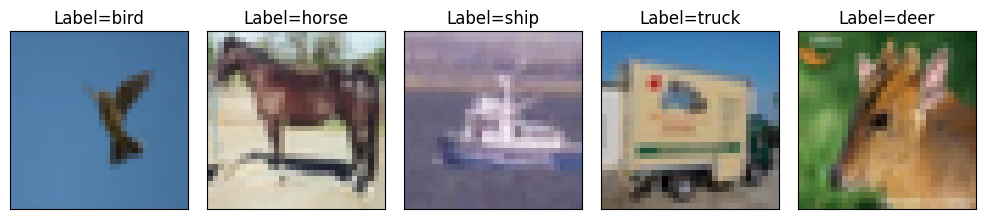

In [ ]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [ ]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   bird horse  ship truck  deer


## Evaluating Train Accuracy

In [ ]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 81.246 %%


## Evaluating Test Accuracy

In [ ]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 84.74 %%


## Evaluating test Accuracy over different classes

In [ ]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 67 %
Accuracy of   car : 100 %
Accuracy of  bird : 71 %
Accuracy of   cat : 66 %
Accuracy of  deer : 91 %
Accuracy of   dog : 81 %
Accuracy of  frog : 91 %
Accuracy of horse : 91 %
Accuracy of  ship : 83 %
Accuracy of truck : 92 %


## Misclassified Images

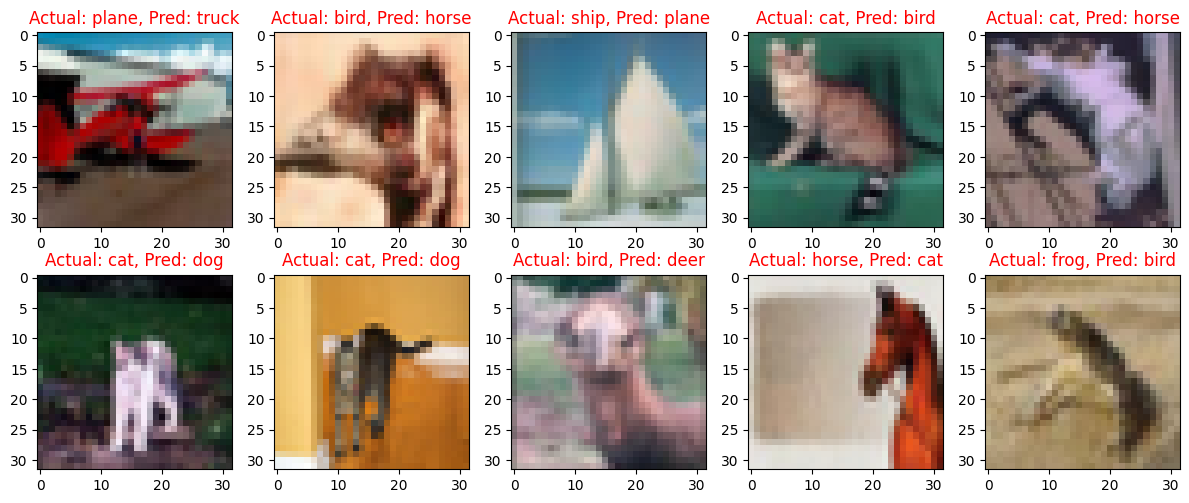

In [ ]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)